In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('market.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
del df['Invoice ID']

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


- Разброс цен (Unit price)
- Количество товаров в заказе (Quantity)
- Общая сумма покупки (Total)
- Валовая прибыль (Gross income)
- Рейтинг (Customer Rating)

#### EDA

In [10]:
product_profit = df.groupby('Product line')['gross income'].sum().sort_values(ascending = False)
product_profit

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: gross income, dtype: float64

- Топ-3 категориии выше они лидеры по прибыли эти категории приносят наибольшую прибыль, их стоит продвигать активнее (скидки, акции, реклама)
- Health and beauty - эта категория приносит меньше всего прибыли среди всех. Возможно, на нее меньше спрос, или цена ниже. Нужно проверить, какие именно товары в этой категории продаются хуже всего.

C:\Users\HP\AppData\Local\Temp\ipykernel_3228\1082859466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = product_profit.values, y = product_profit.index, palette="viridis")


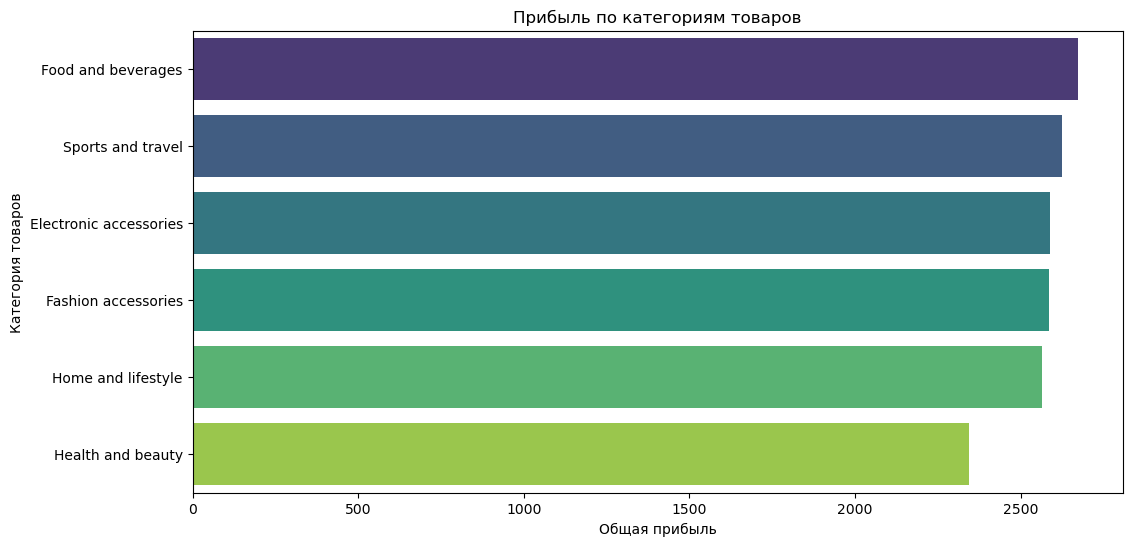

In [11]:
plt.figure(figsize = (12, 6))
sns.barplot(x = product_profit.values, y = product_profit.index, palette="viridis")
plt.xlabel('Общая прибыль')
plt.ylabel('Категория товаров')
plt.title('Прибыль по категориям товаров')
plt.show()

In [12]:
top_categories = ["Food and beverages", "Sports and travel", "Electronic accessories"]
df_top = df[df['Product line'].isin(top_categories)]

top_products = df_top.groupby(['Product line', 'Unit price'])['gross income'].sum().reset_index()
top_products = top_products.sort_values(by = 'gross income', ascending = False)
top_products.head(10)

,Product line,Unit price,gross income
330,Food and beverages,98.52,49.2600
495,Sports and travel,95.44,47.7200
506,Sports and travel,99.96,44.9820
481,Sports and travel,89.80,44.9000
167,Electronic accessories,99.73,44.8785
319,Food and beverages,89.48,44.7400
505,Sports and travel,99.24,44.6580
318,Food and beverages,89.20,44.6000
335,Food and beverages,98.97,44.5365
332,Food and beverages,98.66,44.3970


- Здесь я могу сделать такой вывод что товары с высокой ценой приносят больше всего прибыли. Почти все топовые товары имеют высокую цену(от 89 до 99). Это значит что дорогие товары ползуются спросом.
- Клиенты предпочитают дорогие товары.

#### Рекомендации для бизнеса
- Продвигать дорогие товары из Food & Beverages и Sports & Travel – реклама, акции, скидки на вторую покупку.
- Изучить Electronic Accessories – хотя прибыль высокая, у этой категории только 1 товар в топе.
- Проверить более дешевые товары – возможно, среди них есть скрытые лидеры, которые продаются в большом количестве.

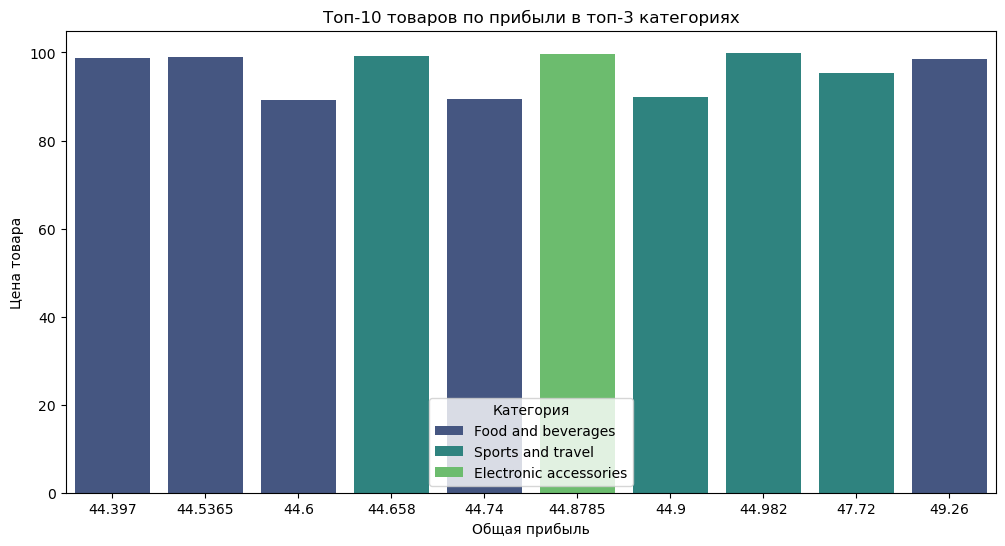

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products["gross income"].head(10), y=top_products["Unit price"].head(10), hue=top_products["Product line"].head(10), palette="viridis")
plt.xlabel("Общая прибыль")
plt.ylabel("Цена товара")
plt.title("Топ-10 товаров по прибыли в топ-3 категориях")
plt.legend(title="Категория")
plt.show()

In [14]:
cheap_products = df[df['Unit price'] < 50]

cheap_products_profit = cheap_products.groupby(['Product line', 'Unit price'])['gross income'].sum().reset_index()
cheap_products_profit = cheap_products_profit.sort_values(by = 'gross income', ascending = False)
cheap_products_profit.head(10)

,Product line,Unit price,gross income
433,Sports and travel,49.33,24.665
362,Home and lifestyle,49.01,24.505
292,Health and beauty,48.63,24.315
74,Electronic accessories,46.57,23.285
354,Home and lifestyle,45.68,22.840
70,Electronic accessories,45.48,22.740
427,Sports and travel,44.86,22.430
151,Fashion accessories,49.04,22.068
150,Fashion accessories,48.96,22.032
424,Sports and travel,44.02,22.010


##### Выводы из анализа дешевых товаров:
- Sports and Travel – наибольшая прибыль среди дешевых товаров.Это может указывать на хороший спрос на спортивные товары или на высокую наценку.

- Home and Lifestyle и Electronic Accessories – тоже показывают достойные результаты в среднем ценовом диапазоне 44-49. Это говорит о том, что дешевые товары в этих категориях также востребованы, но при этом их количество продаж ниже.

- Health and Beauty, Fashion Accessories – в этих категориях товары приносят меньше прибыли в рамках дешевых товаров, но тем не менее они все равно остаются важной частью ассортимента.

##### Рекомендации для бизнеса:
- Продвигать товары категории Sports and Travel – они дают хорошую прибыль, возможно, из-за популярности этих товаров в настоящее время.
- Активнее рекламировать Home and Lifestyle и Electronic Accessories-  они тоже приносят хорошую прибыль при относительно низкой цене.
- Проанализировать Health and Beauty и Fashion Accessories – возможно, стоит пересмотреть ассортимент или увеличить наценку на эти товары для улучшения прибыли.

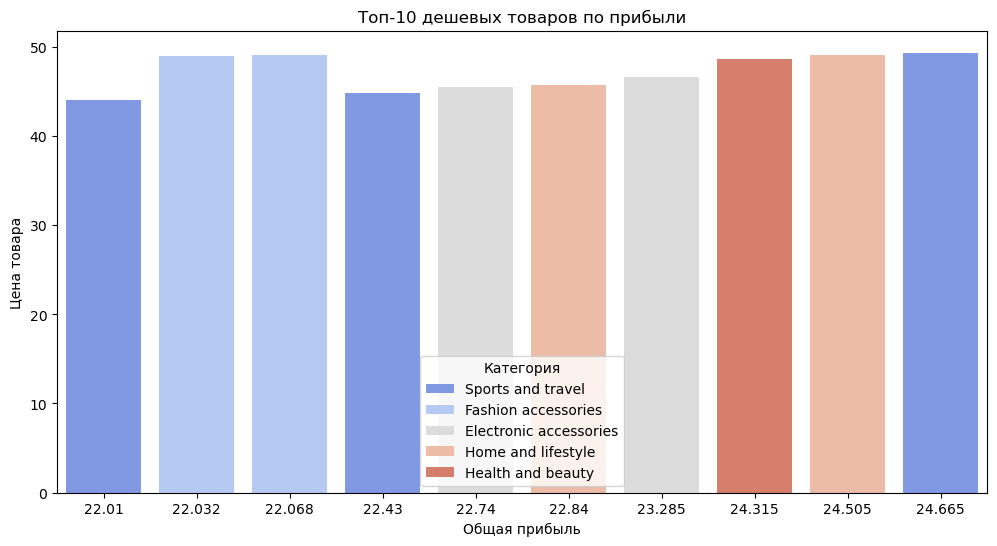

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cheap_products_profit["gross income"].head(10), 
            y=cheap_products_profit["Unit price"].head(10), 
            hue=cheap_products_profit["Product line"].head(10), 
            palette="coolwarm")
plt.xlabel("Общая прибыль")
plt.ylabel("Цена товара")
plt.title("Топ-10 дешевых товаров по прибыли")
plt.legend(title="Категория")
plt.show()

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

   Year  Month  gross income
0  2019      1      5537.708
1  2019      2      4629.494
2  2019      3      5212.167


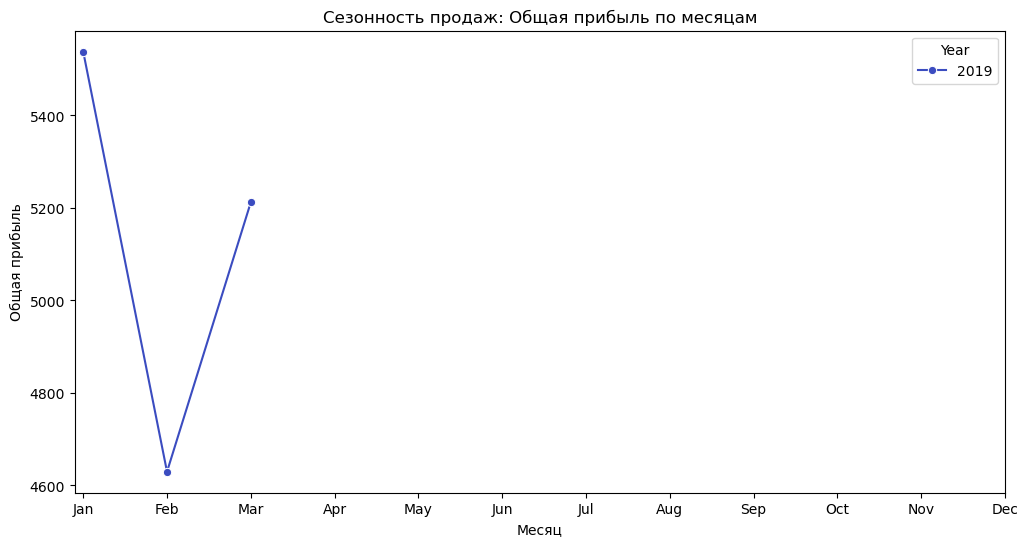

In [17]:
monthly_sales = df.groupby(['Year', 'Month'])['gross income'].sum().reset_index()
print(monthly_sales)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='gross income', hue='Year', marker='o', palette='coolwarm')
plt.xlabel("Месяц")
plt.ylabel("Общая прибыль")
plt.title("Сезонность продаж: Общая прибыль по месяцам")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

- По моему эти данные только на 3 месяца

C:\Users\HP\AppData\Local\Temp\ipykernel_3228\864534162.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=hourly_sales, x='Time', y='gross income', marker='o', palette='coolwarm')


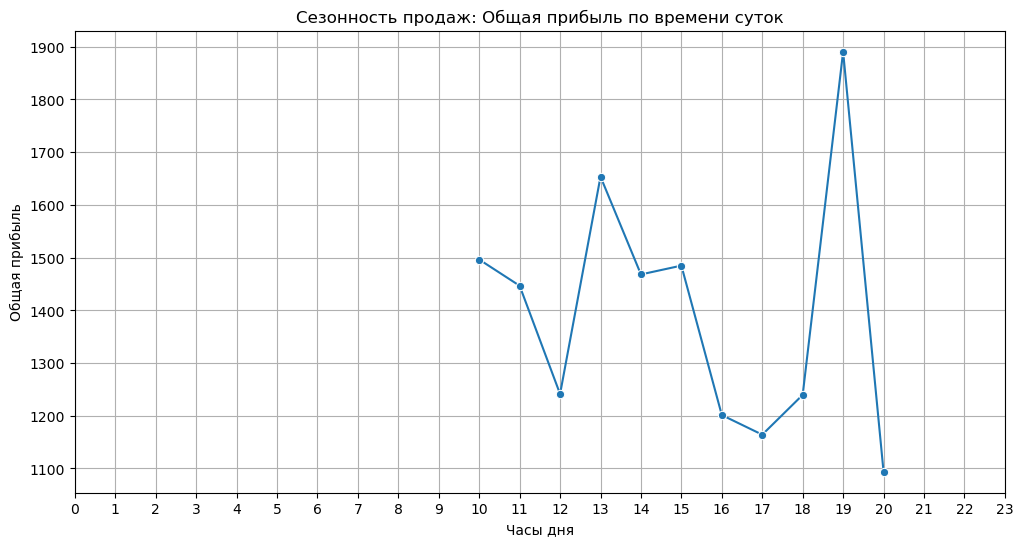

In [18]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
hourly_sales = df.groupby('Time')['gross income'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sales, x='Time', y='gross income', marker='o', palette='coolwarm')
plt.xlabel("Часы дня")
plt.ylabel("Общая прибыль")
plt.title("Сезонность продаж: Общая прибыль по времени суток")
plt.xticks(np.arange(0, 24, step=1))
plt.grid(True)
plt.show()

##### Рекомендации по времени суток:
- Увеличить маркетинговые усилия в периоды с высокой прибылью:

13:00–14:00 (обеденное время) и 19:00 (вечер) — это время, когда продажи на пике.
Можно запускать рекламные акции или скидки, чтобы привлечь больше покупателей в эти периоды.
- Проанализировать причины падения прибыли в 12:00 и 20:00:

Возможно, в эти часы покупатели менее активны. Стоит подумать о повышении активности в эти моменты (например, с помощью скидок на обед или вечерних предложений).
- Планировать работу персонала:

В периоды 13:00–14:00 и 19:00 увеличь количество сотрудников на кассах или в зале, чтобы ускорить процесс обслуживания и улучшить клиентский опыт.

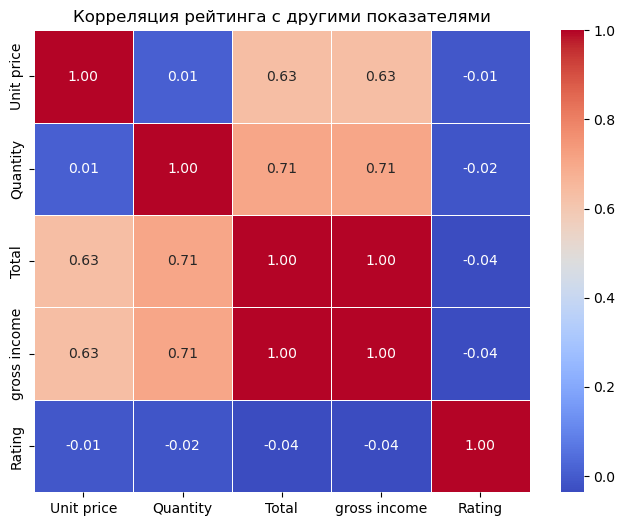

In [19]:
numeric_cols = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']
corr_matrix = df[numeric_cols].corr()

# Строим тепловую карту корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляция рейтинга с другими показателями")
plt.show()

- Из этого корреляционного матрица видно что рейтинг не заваисить от цены, общей суммы покупки или прибыли.

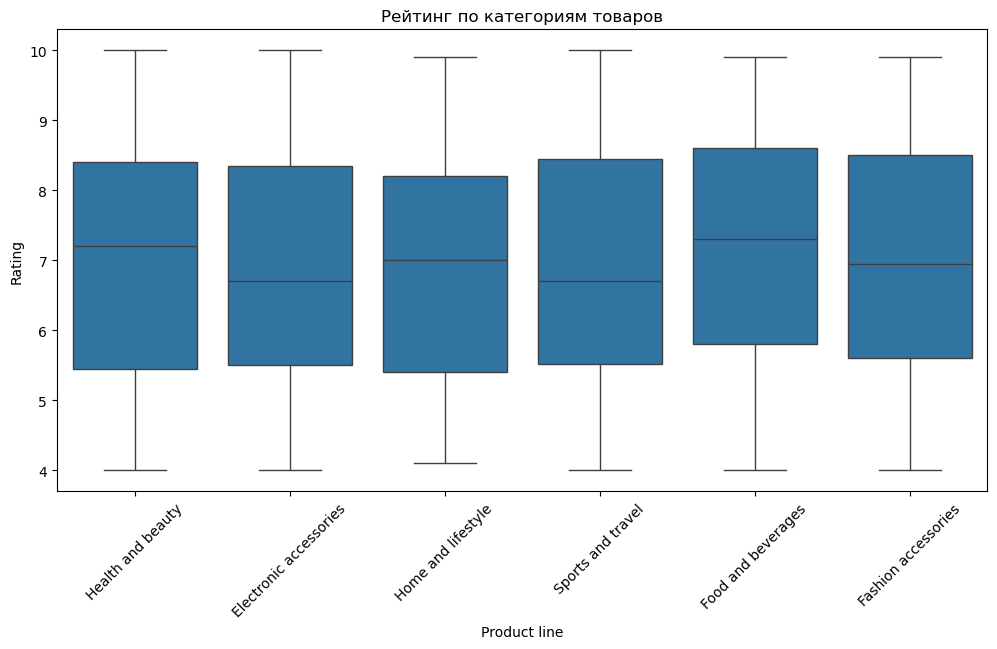

In [20]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Product line', y = 'Rating')
plt.xticks(rotation = 45)
plt.title('Рейтинг по категориям товаров')
plt.show()

- Нет категории, которая явно получает хуже или лучше оценки. Это подтверждает, что качество товаров в разных категориях воспринимается одинаково.
- В каждой категории есть клиенты, которые ставять низкие оценки. Это можеть говорить о неудовлетворенности сервисом или качеством товаров.

C:\Users\HP\AppData\Local\Temp\ipykernel_3228\435105377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Payment', y = 'Rating', palette = 'coolwarm')


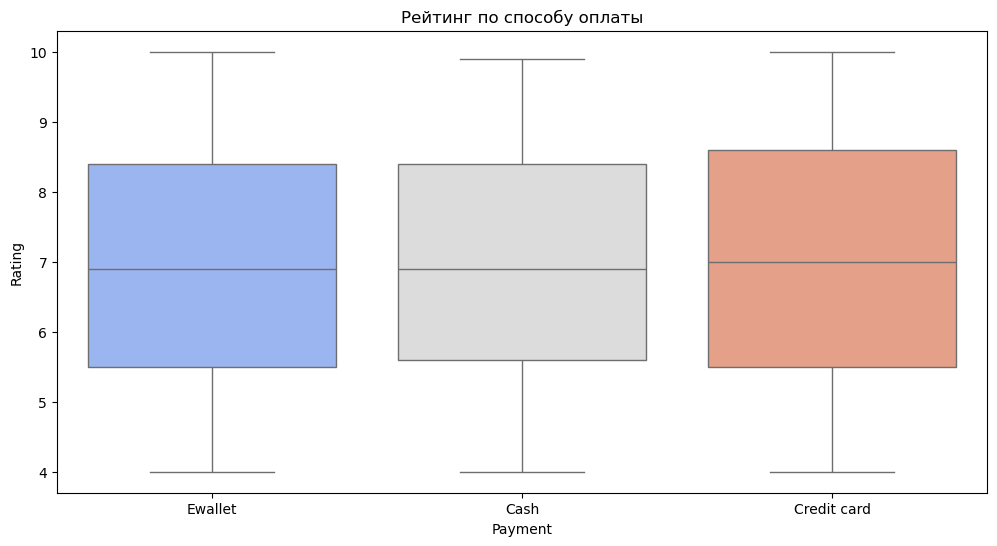

In [21]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = df, x = 'Payment', y = 'Rating', palette = 'coolwarm')
plt.title('Рейтинг по способу оплаты')
plt.show()

- По способу оплаты нет ни каких различия

C:\Users\HP\AppData\Local\Temp\ipykernel_3228\4218034924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'City', y = 'Rating', palette = 'coolwarm')


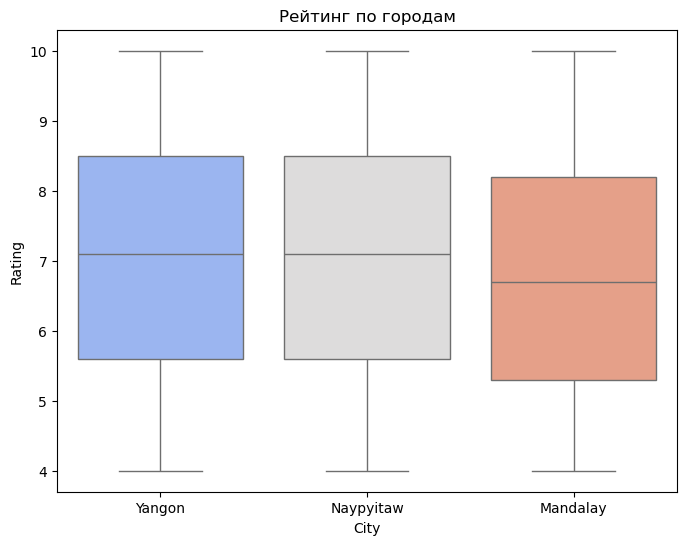

In [22]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'City', y = 'Rating', palette = 'coolwarm')
plt.title('Рейтинг по городам')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_3228\744892107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Time', y = 'Rating', palette = 'coolwarm')


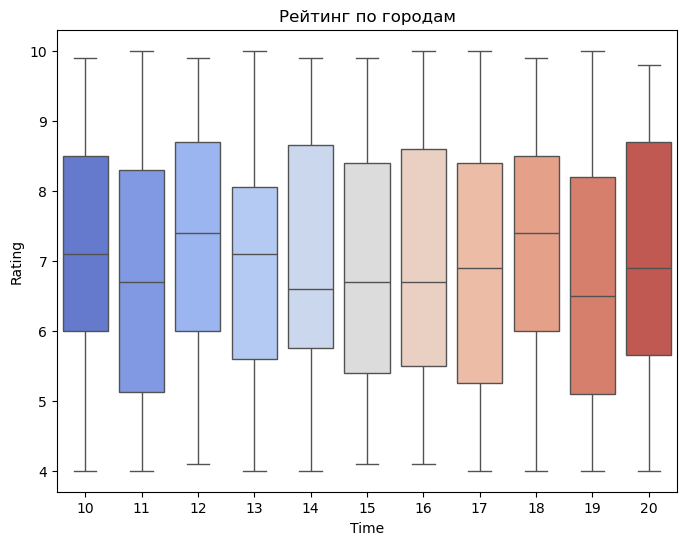

In [23]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = 'Time', y = 'Rating', palette = 'coolwarm')
plt.title('Рейтинг по городам')
plt.show()

#### Анализ продаж и прибыли
##### Что  мы узнали из этих анализов ?
Топ - 3 категории по прибыли:

- Food and Beverages
- Sports and Travel
- Electronic Accessories

##### Самые прибыльные товары:

Продукты с высокой ценой приносят наибольшую прибыль.
Запускать комплектные предложения (например, аксессуары со скидкой при покупке техники).

##### Сезонность продаж
 - Что мы узнали?
 Максимальная прибыль в январе, минимальная в феврале.
 В течение дня пики продаж в 13:00-14:00 и 19:00.

##### Анализ рейтингов и удовлетворенности клиентов
- Что мы узнали?
 Корреляция рейтингов с другими параметрами слабая – значит, на рейтинг влияют не только продажи, но и другие факторы.
Вечером рейтинг ниже, чем утром.

- Что делать?
- Улучшить сервис в вечерние часы – больше персонала, контроль качества обслуживания.
- Анализировать отзывы клиентов, чтобы понять, что именно влияет на рейтинг.

In [24]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df.select_dtypes(include=['object']))

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())
data_encoded_one = df.drop(columns=df.select_dtypes(include=['object']).columns)
data_encoded = pd.concat([data_encoded_one, encoded_df], axis=1)

data_encoded.head()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,...,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,2019-01-05,13,522.83,4.761905,26.1415,9.1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,15.28,5,3.8200,80.2200,2019-03-08,10,76.40,4.761905,3.8200,9.6,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46.33,7,16.2155,340.5255,2019-03-03,13,324.31,4.761905,16.2155,7.4,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,58.22,8,23.2880,489.0480,2019-01-27,20,465.76,4.761905,23.2880,8.4,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,86.31,7,30.2085,634.3785,2019-02-08,10,604.17,4.761905,30.2085,5.3,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating', 'gross margin percentage']])

In [26]:
data_final = pd.concat([data_encoded, pd.DataFrame(scaled_data)], axis=1)

In [27]:
del data_final['Date']

In [28]:
data_final.columns = data_final.columns.astype(str)

In [29]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(data_final)
    inertia.append(kmeans.inertia_)

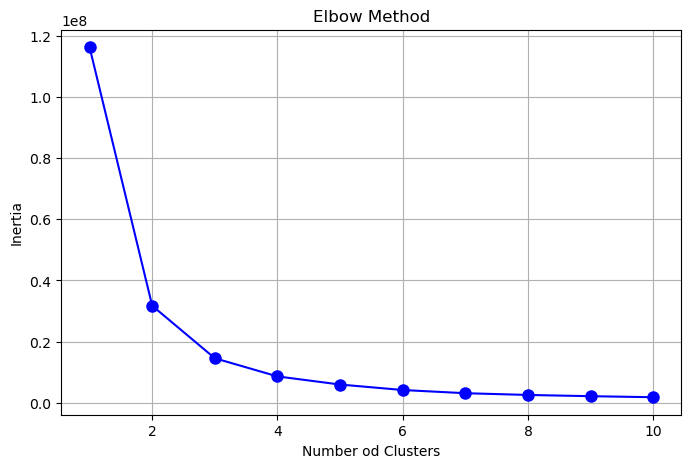

In [30]:
%matplotlib inline
plt.figure(figsize = (8, 5))
plt.plot(range(1, 11), inertia, 'bo-', markersize = 8)
plt.title('Elbow Method')
plt.xlabel('Number od Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [31]:
silhouette_scores = {}
for n_clusters in [2, 3, 4, 5, 6, 7]:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data_final)
    silhouette_scores[n_clusters] = silhouette_score(data_final, cluster_labels)

print(f"Silhouette Score for 2 clusters: {silhouette_scores[2]:.3f}")
print(f"Silhouette Score for 3 clusters: {silhouette_scores[3]:.3f}")
print(f"Silhouette Score for 4 clusters: {silhouette_scores[4]:.3f}")
print(f"Silhouette Score for 5 clusters: {silhouette_scores[5]:.3f}")
print(f"Silhouette Score for 6 clusters: {silhouette_scores[6]:.3f}")
print(f"Silhouette Score for 7 clusters: {silhouette_scores[7]:.3f}")
print("\n")

# Determine the optimal number of clusters based on Silhouette Scores
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

Silhouette Score for 2 clusters: 0.644
Silhouette Score for 3 clusters: 0.591
Silhouette Score for 4 clusters: 0.548
Silhouette Score for 5 clusters: 0.521
Silhouette Score for 6 clusters: 0.515
Silhouette Score for 7 clusters: 0.514


Optimal number of clusters based on Silhouette Score: 2


In [32]:
kmeans = KMeans(n_clusters = optimal_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
data_final['Cluster'] = kmeans.fit_predict(data_final)

In [33]:
data_final.groupby('Cluster').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,Month,...,Payment_Credit card,Payment_Ewallet,0,1,2,3,4,5,6,7
Cluster,,,,,,,,,,,,,,,,,,,,,
0,46.461868,4.392241,8.771295,184.197200,14.939655,175.425905,4.761905,8.771295,7.015661,2.012931,...,0.307471,0.346264,-0.347801,-0.382536,-0.564649,-0.564649,-0.564649,-0.564649,0.025010,0.0
1,76.758783,8.069079,30.508380,640.675979,14.842105,610.167599,4.761905,30.508380,6.874342,1.947368,...,0.319079,0.342105,0.796282,0.875806,1.292750,1.292750,1.292750,1.292750,-0.057261,0.0


### Анализ:

1. **Клиенты в кластере 1 (высокие траты):**
   - Покупают товары дороже (средняя цена 76.76).
   - Покупают больше единиц товара (среднее количество 8.07).
   - Их общая сумма покупок значительно выше (640.68).
   - Это может быть группа клиентов с более высокими доходами или склонностью тратить больше на продукцию.

2. **Клиенты в кластере 0 (меньше покупок и товаров):**
   - Покупают более дешевые товары (средняя цена 46.46).
   - Совершают меньше покупок в сравнении с кластером 1 (среднее количество 4.39).
   - Это может быть группа клиентов с ограниченными бюджетами или покупающих меньше товаров за раз.

3. **Общие особенности кластеров:**
   - Оба кластера имеют схожий процент валовой прибыли (около 4.76%), что говорит о сходных маржинальных уровнях продуктов, но разница в объемах продаж (где кластер 1 значительно опережает кластер 0).
   - Разница в общем доходе между кластерами может указывать на то, что кластер 1 представляет более прибыльных клиентов, и для этого сегмента может быть полезно предложить более дорогие и эксклюзивные товары.

### Рекомендации для бизнеса:
1. **Для кластера 0 (меньше покупок и товаров):**
   - Разработать стратегии для увеличения количества покупок. Например, предложить скидки на товары или запустить лояльностные программы.
   - Проводить акции и предложения, чтобы стимулировать этот сегмент совершать более крупные покупки.

2. **Для кластера 1 (высокие траты):**
   - Для этого сегмента стоит создать эксклюзивные предложения и персонализированные рекомендации, чтобы увеличить их расходы.
   - Важно предложить премиальные товары и дополнительные услуги (например, расширенная гарантия, подарочные карты).

3. **Оптимизация маркетинга:**
   - Маркетинговые усилия могут быть направлены на привлечение клиентов из кластера 0 к более частым покупкам с помощью акций, и на удержание клиентов из кластера 1 через премиум-продукты и предложения.